# Convolutional NN (MNIST dataset) with Keras


In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


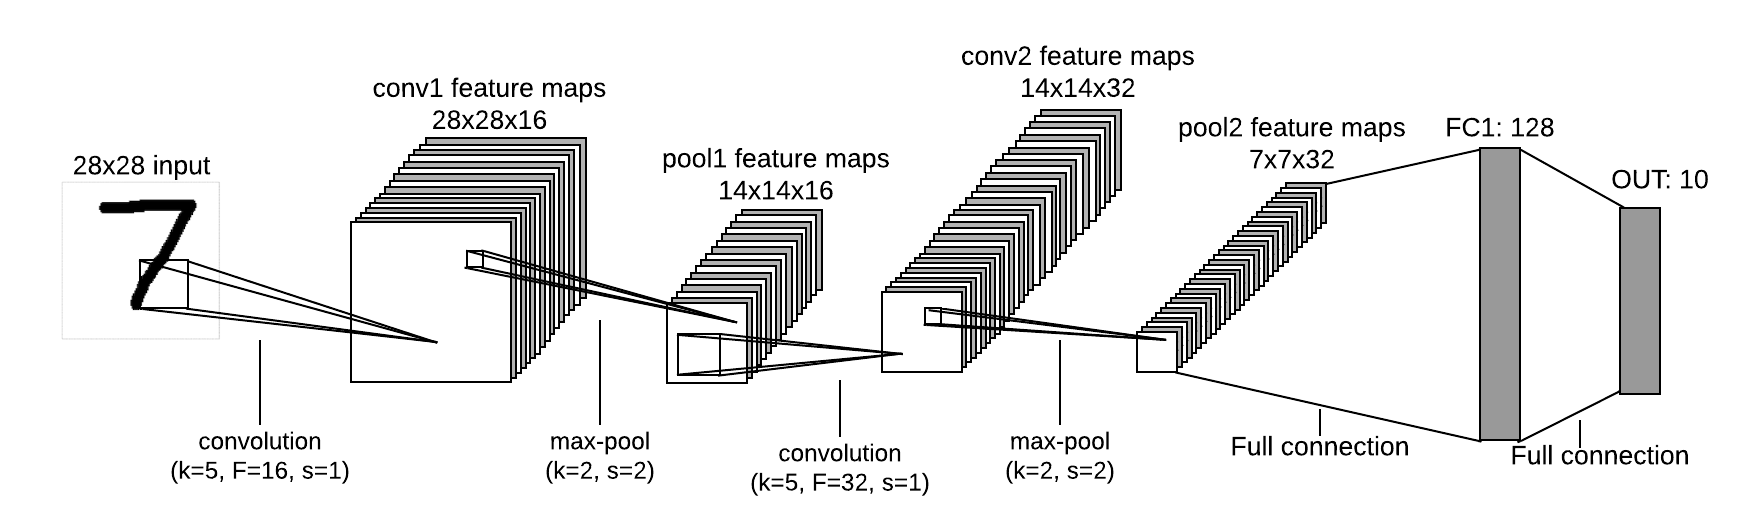

In [31]:
batch_size = 128
num_classes = 10
epochs = 10
from IPython.display import Image
Image('/Users/mahatisuvvari/Desktop/cnnmnist.png')

In [3]:
img_x, img_y = 28, 28

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 21s 2us/step


In [18]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

(28, 28, 1)


In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [23]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [36]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 636us/step - loss: 2.3016 - acc: 0.1104 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 38s 628us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 36s 592us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 38s 629us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 43s 723us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 51s 857us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 45s 748us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.

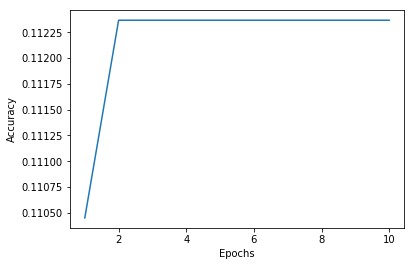

In [37]:
history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()